In [1]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

%matplotlib inline

In [2]:
# read in data and segment to teens
data = pd.read_csv('Data/NSCH_2019.csv')
adol = data[data['sc_age_years'] >= 13].drop(columns = 'Unnamed: 0')

# rename columns to upper case
adol.rename(str.upper, axis='columns', inplace = True)

Isolate columns to drop and target variable columns. The following columns were not relevant to the goal of hte project, for example seeing a Dentist is probably not related to Depression.

In [1]:

drop_cols = [
    'A1_GRADE_IF',
    'A1_LIVEUSA' ,
    'A1_RELATION',
    'A1_SEX',
    'A1_GRADE',
    'A2_LIVEUSA',
    'A2_SEX',
    'A2_GRADE',
    'ARTHRITIS_DESC',
    'APPOINTMENT',
    'AVAILABLE',
    'BIRTH_MO',
    'BIRTH_YR',
    'BIRTH_YR_F',
    'BIRTHWT', 
    'BIRTHWT_L',
    'BIRTHWT_VL',
    'BLOOD_SCREEN',
    'CBSAFP_YN',
    'CERPALS_DESC',
    'CURRINS',
    'DECISIONS',
    'DENTALSERV1',
    'DENTALSERV2',    
    'DENTALSERV3',
    'DENTALSERV4',    
    'DENTALSERV5',
    'DENTALSERV6',
    'DENTALSERV7',
    'DENTISTVISIT',
    'DISCUSSOPT',
    'DOCPRIVATE',
    'DOCROOM',
    'DOWNSYN_DESC',
    'FIPSST',
    'FORMTYPE',
    'FPL_IF',
    'FWC',
    'GENETIC_SCREEN',
    'HCCOVOTH',
    'HEADACHE_DESC',
    'HEALTHKNOW',
    'HEART_DESC',
    'HHCOUNT_IF',
    'HHID',
    'HIGRADE',
    'INSGAP',
    'INSTYPE',
    'ISSUECOST',
    'K11Q03R',
    'K12Q01_A',
    'K12Q01_B',
    'K12Q01_C',
    'K12Q01_D',
    'K12Q01_E',
    'K12Q01_F',
    'K12Q01_G',
    'K12Q03',
    'K12Q04',
    'K12Q12',
    'K2Q30C',
    'K2Q31C',
    'K2Q34C',
    'K2Q35A_1_YEARS',
    'K2Q35B',
    'K2Q35D',
    'K2Q36C',
    'K2Q37C',
    'K2Q38C',
    'K2Q40C',
    'K2Q41C',
    'K2Q42C',
    'K2Q46A',
    'K2Q46C',
    'K2Q60B',
    'K2Q60C',
    'K2Q61B',
    'K3Q04_R',
    'K3Q20',
    'K3Q21B',
    'K3Q22',
    'K4Q02_R',
    'K4Q26',
    'K4Q28X_EAR',
    'K4Q28X01',
    'K4Q28X02',
    'K4Q28X03',
    'K4Q28X04',
    'K4Q28X05',
    'K4Q32X01',
    'K4Q32X02',
    'K4Q32X03',
    'K4Q32X04',
    'K4Q32X05',
    'K4Q37',   
    'K5Q10',
    'K5Q11',
    'K5Q20_R',
    'K5Q21',
    'K5Q22',
    'K5Q30',
    'K5Q40',
    'K5Q41',
    'K5Q42',
    'K5Q43',
    'K5Q44',
    'K5Q31_R',
    'K5Q32',
    'LIVEUSA_MO',
    'MEDHISTORY',
    'METRO_YN',
    'MPC_YN',
    'NOTELIG',
    'NOTOPEN',
    'PLANNEEDS_R',
    'RAISECONC',
    'RECEIVECOPY',
    'SC_AGE_LT10',
    'SC_AGE_LT4',
    'SC_AGE_LT6',
    'SC_AGE_LT9',
    'SC_CSHCN',
    'SC_HISPANIC_R_IF',
    'SC_K2Q11',
    'SC_K2Q12',
    'SC_K2Q14',
    'SC_K2Q15',
    'SC_K2Q17',
    'SC_K2Q18',
    'SC_K2Q20',
    'SC_K2Q21',
    'SC_K2Q23',
    'SC_RACE_R_IF',
    'SC_RACEAIAN',
    'SC_RACEASIA',
    'SC_RACER',
    'SC_SEX_IF',
    'SESPLANMO',
    'SESPLANYR',
    'SPCSERVMO',
    'STRATUM',
    'SUBABUSE_DESC',
    'TENURE',
    'TENURE_IF',
    'TOTAGE_0_5',
    'TOTAGE_12_17',
    'TOTAGE_6_11',
    'TOTCSHCN',
    'TOTFEMALE',
    'TOTMALE',
    'TOTNONSHCN',
    'TRANSPORTCC',
    'TREATADULT',
    'TREATCHILD',
    'TREATNEED',
    'TRICARE',
    'USUALSICK',
    'WRITEPLAN',
    'YEAR',
    'WGTCONC'
]

target_cols = [
    'K2Q32A',
    'K2Q32B',
    'K2Q32C',
    'K2Q33A',
    'K2Q33B',
    'K2Q33C', 
]

adol = adol.drop(columns = drop_cols)

NameError: name 'adol' is not defined

In [5]:
# drop columns and filter out subjects with disorders that can affect brain development

adol = adol.loc[
    (adol['K2Q35A'] == 2) &
    (adol['DOWNSYN'] == 2) &
    (adol['CYSTFIB'] == 2) &         
    (adol['K2Q36A'] == 2) &         
    (adol['K2Q43B'] == 2) &        
    (adol['K2Q46B'] != 1)  &       
    (adol['K2Q60A'] != 1)  &      
    (adol['BLINDNESS'] != 1) &
    (adol['K2Q38B'] != 1) &
    (adol['K2Q61A'] != 1)
               ]

adol = adol.loc[adol['K2Q32A'].notnull()]
adol = adol.loc[adol['K2Q33A'].notnull()]

# get list of columns where all responses are identical (including nan) and drop them from dataset
same_response_cols = [col for col in adol.columns if adol[col].unique().shape == (1,)]
adol = adol.drop(columns = same_response_cols)

# average FPL (family poverty level) implicates
adol['FPL'] = adol[['FPL_I1', 'FPL_I2', 'FPL_I3', 'FPL_I4', 'FPL_I5', 'FPL_I6']].mean(axis=1)
adol = adol.drop(columns = ['FPL_I1', 'FPL_I2', 'FPL_I3', 'FPL_I4', 'FPL_I5', 'FPL_I6'])

# reset index
adol.reset_index(drop = True, inplace = True)

# create column to indicate history of anxiety OR depression
adol['dep_anx_hist'] = [1 if ((adol['K2Q33A'][i] == 1) or (adol['K2Q32A'][i] == 1)) else 2 for i in range(adol.shape[0])]

# Distribution of Variables
----
Here I conducted some preliminary EDA to examine demographic distributions.

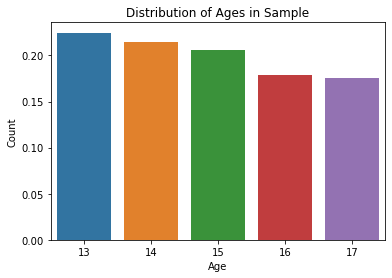

In [9]:
# basic EDA on demographics of sample
sns.barplot(data = adol, x = [13, 14, 15, 16, 17], y = adol['SC_AGE_YEARS'].value_counts(normalize=True))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages in Sample');

Age is pretty evenly distributed

----

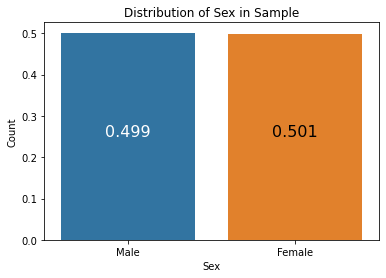

In [10]:
sns.barplot(data = adol, x = [1, 2], y = adol['SC_SEX'].value_counts(normalize = True))
plt.xticks([0, 1], ['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex in Sample');
plt.text(x = 0, y = .25, s = round(adol['SC_SEX'].value_counts(normalize = True)[1],3), color='white', ha="center", fontsize = 16)
plt.text(x = 1, y = .25, s = round(adol['SC_SEX'].value_counts(normalize = True)[2],3), color='black', ha="center", fontsize = 16);

Sex is also evenly distributed. <br>
<br>
**Important note**: Child's gender was not asked on this survey. This project does not condone the assumption of a gender binary. 

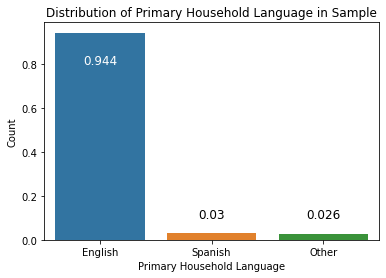

In [11]:
sns.barplot(data = adol, x = [1, 2, 3], y = adol['HHLANGUAGE'].value_counts(normalize = True), )
plt.xticks([0, 1, 2], ['English', 'Spanish', 'Other'])
plt.xlabel('Primary Household Language')
plt.ylabel('Count')
plt.title('Distribution of Primary Household Language in Sample')
plt.text(x = 0, y = .8, s = round(adol['HHLANGUAGE'].value_counts(normalize = True)[1],3), color='white', ha="center", fontsize = 12)
plt.text(x = 1, y = .1, s = round(adol['HHLANGUAGE'].value_counts(normalize = True)[2],3), color='black', ha="center", fontsize = 12);
plt.text(x = 2, y = .1, s = round(adol['HHLANGUAGE'].value_counts(normalize = True)[3],3), color='black', ha="center", fontsize = 12);

Considering how overwhelming the sample skews towards English as the primary household language, this variable might not be a great feature to use in our model. Only 5.5% of our sample does not speak English as the primary language. This totals to about 504 observations. 

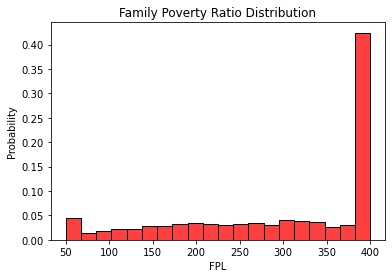

In [12]:
sns.histplot(adol['FPL'], color='red', stat = 'probability')
plt.title('Family Poverty Ratio Distribution');

It is important to note that FPL = 50 means 50 or below. Similarly, FPL = 400 means 400 or above. Over 40% of our population has an FPL of 400 or above, so more wealthy families are represented in our sample. This is consistent with the US population, of which 41.5% are at an FPL of 400 or above. <br>
[Source](https://www.kff.org/other/state-indicator/distribution-by-fpl/?currentTimeframe=0&sortModel=%7B%22colId%22:%22Location%22,%22sort%22:%22asc%22%7D)

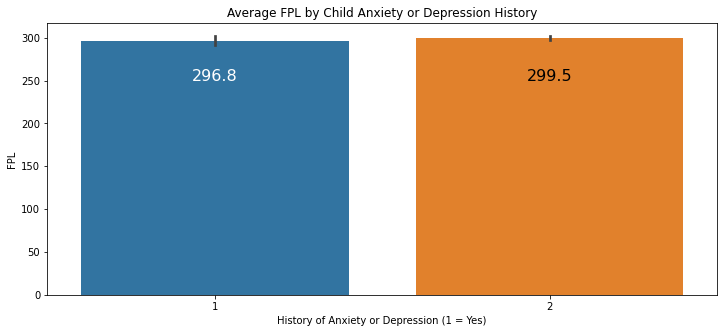

In [13]:
plt.figure(figsize = (12, 5))
sns.barplot(data = adol, x = 'dep_anx_hist', y = 'FPL')
plt.xlabel('History of Anxiety or Depression (1 = Yes)')
plt.ylabel('FPL')
plt.title('Average FPL by Child Anxiety or Depression History')
adol['FPL'].groupby(by = adol['dep_anx_hist']).mean()
plt.text(x = 0, y = 250, s = round(adol['FPL'].groupby(by = adol['dep_anx_hist']).mean()[1],1), color='white', ha="center", fontsize = 16)
plt.text(x = 1, y = 250, s = round(adol['FPL'].groupby(by = adol['dep_anx_hist']).mean()[2],1), color='black', ha="center", fontsize = 16);

This is more important for our data integrity. Children from equal _average_ levels of economic status are represented in our sample. Below shows a density plot for the distribution of FPL by history of depression or anxiety. There is a larger proportion of FPL > 400 in the non-depressed/anxious group though. Economic status is associated with a lot of cognitive functions, such as Executive Function. There are also other variables that assess other factors influenced by socioeconomic status, such as community safety. 

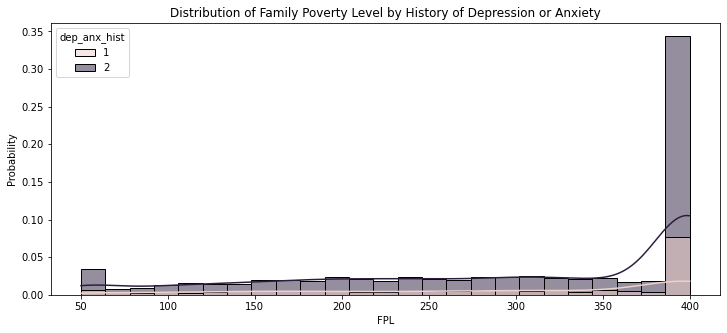

In [14]:
plt.figure(figsize = (12, 5))
sns.histplot(data = adol, x = 'FPL', hue= 'dep_anx_hist', color='red', stat = 'probability', kde=True, bins = 25)
plt.title('Distribution of Family Poverty Level by History of Depression or Anxiety');

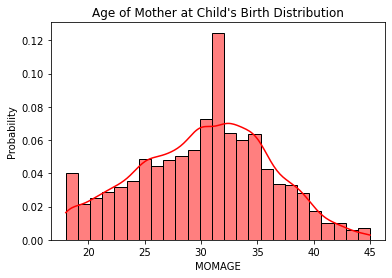

In [15]:
sns.histplot(adol['MOMAGE'], color='red', stat = 'probability', kde=True, bins = 25)
plt.title("Age of Mother at Child's Birth Distribution");

The age of a mother at the child's birth can have a large effect on certain kinds of birth defects or developmental defects. Note that responses coded as 18 include 18 and below, and responses coded as 45 include 45 and above. 

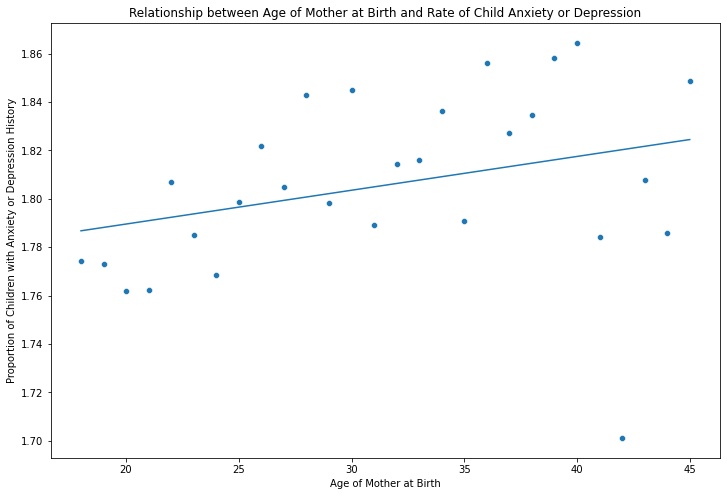

In [16]:
plt.figure(figsize = (12, 8))
momage_depanxhist = pd.DataFrame(adol['dep_anx_hist'].groupby(by = adol['MOMAGE']).mean())
sns.scatterplot(data = momage_depanxhist, x = 'MOMAGE', y = 'dep_anx_hist')
m, b = np.polyfit(momage_depanxhist.index, momage_depanxhist['dep_anx_hist'], 1)
plt.plot(momage_depanxhist.index, m*momage_depanxhist.index + b)
plt.xlabel('Age of Mother at Birth')
plt.ylabel('Proportion of Children with Anxiety or Depression History')
plt.title('Relationship between Age of Mother at Birth and Rate of Child Anxiety or Depression');

In [17]:
adol.corr()['dep_anx_hist'].loc['MOMAGE']

0.035312110773162174

This graph actually contradicts my assumption that older maternal age could be associated with more incidences of anxiety or depression. According to this data, the younger a mother is at birth, the higher the risk is of a child developing anxiety or depression sometime in their life. However, the correlation is pretty small. Nonetheless, parental age has a strong effect on family dynamics, parental maturity, financial security, and more. It will be interesting to see if this feature has much importance in the model.

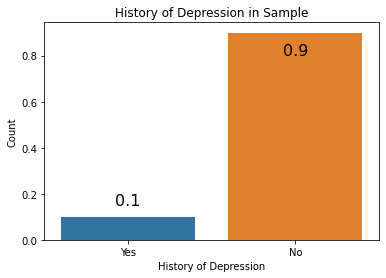

In [18]:
# plot depression
sns.barplot(data = adol, x = [2, 1], y = adol['K2Q32A'].value_counts(normalize = True))
plt.xticks([0, 1], ['Yes', 'No'])
plt.xlabel('History of Depression')
plt.ylabel('Count')
plt.title('History of Depression in Sample');
plt.text(x = 0, y = .15, s = round(adol['K2Q32A'].value_counts(normalize = True)[1],3), color='black', ha="center", fontsize = 16);
plt.text(x = 1, y = .8, s = round(adol['K2Q32A'].value_counts(normalize = True)[2],3), color='black', ha="center", fontsize = 16);

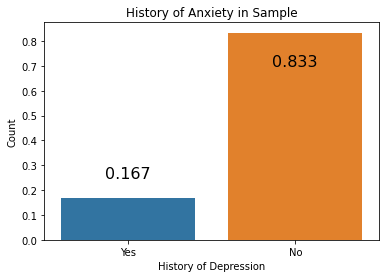

In [19]:
# plot anxiety
sns.barplot(data = adol, x = [2, 1], y = adol['K2Q33A'].value_counts(normalize = True))
plt.xticks([0, 1], ['Yes', 'No'])
plt.xlabel('History of Depression')
plt.ylabel('Count')
plt.title('History of Anxiety in Sample');
plt.text(x = 0, y = .25, s = round(adol['K2Q33A'].value_counts(normalize = True)[1],3), color='black', ha="center", fontsize = 16);
plt.text(x = 1, y = .7, s = round(adol['K2Q33A'].value_counts(normalize = True)[2],3), color='black', ha="center", fontsize = 16);


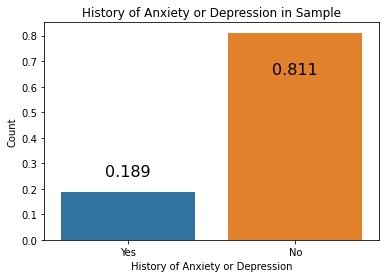

In [21]:
# plot Anxiety OR Depression history
sns.barplot(data = adol, x = [1, 0], y = adol['dep_anx_hist'].value_counts(normalize = True))
plt.xticks([0, 1], ['Yes', 'No'])
plt.xlabel('History of Anxiety or Depression')
plt.ylabel('Count')
plt.title('History of Anxiety or Depression in Sample');
plt.text(x = 0, y = .25, s = round(adol['dep_anx_hist'].value_counts(normalize = True)[1],3), color='black', ha="center", fontsize = 16);
plt.text(x = 1, y = .65, s = round(adol['dep_anx_hist'].value_counts(normalize = True)[2],3), color='black', ha="center", fontsize = 16);


Depression and anxiety have a lot of common features. Some studies estimate the comorbidity of these disorders as over 50% ([Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC181193/)). Given the imbalance between observations with a history of anxiety or depression and observations without, the classification model built will predict the presence of **either** of these disorders. Possible appraoches to the imbalanced classes will be the following:

- Doing nothing
- Oversampling the minority class (in this case, the patient class)
- Using SMOTE
- Undersampling the majority class (in this case, the non-patient class)
- Weighting each class in the classification model appropriately
- Adjusting the class cutoff threshold

In [23]:
pd.DataFrame(adol['ALTHEALTH'].groupby(by = adol['dep_anx_hist']).value_counts(normalize=True))

ALTHEALTH
dep_anx_hist ALTHEALTH           
1            2.0         0.819575
             1.0         0.180425
2            2.0         0.902289
             1.0         0.097711

1 = Yes for ALTHEALTH <br>
2 = No for ALTHEALTH

0 = Yes for dep_anx_hist <br>
1 = No for dep_anx_hist <br>

There is a higher occurence (double) of using Alternative Health Care (Alternative health care can include acupuncture, chiropractic care, relaxation therapies, herbal supplements, and others.) in children that have a history of anxiety and depression than in children that don't.

# Data Cleaning
----

Some nulls are OKAY, and indicate logic tree usage. However, columns that have over 20% of their data as nulls are not going to be helpful in our model. 

### Non-Skip Logic Columns:

In [24]:
# these are the columns with nulls that are NOT due to a skip-logic clause
non_skip_cols = [ 
    'SC_K2Q19', 'SC_K2Q22', 'HOUSE_GEN', 'FAMILY_R','BMICLASS',
    'SC_ENGLISH', 'SC_K2Q10', 'SC_K2Q13', 'SC_K2Q16',
    'BEDTIME', 'ACE1', 'MAKEFRIEND', 'K4Q30_R',
    'K8Q21','K8Q30', 'K7Q33', 'BIRTHWT_OZ_S',
    'K7Q30', 'K7Q31', 'HOSPITALER', 'K4Q04_R',
    'REPEATED', 'AVOIDCHG','CUTHOURS','STOPWORK',
    'K3Q25','CURRCOV','K4Q36','K6Q15','HOSPITALSTAY',
    'K4Q27','ALTHEALTH','K4Q23','K4Q31_R','USUALGO','K4Q01',
    'OVERWEIGHT','S4Q01','K2Q05','K2Q31A','K2Q30A',                   
    'K2Q60A', 'K2Q37A', 'K2Q34A','SUBABUSE', 'GENETIC', 
    'BLOOD', 'K2Q38A', 'HEADACHE', 'HEART', 'K2Q42A',
    'K2Q41A', 'K2Q61A', 'K2Q40A', 'ARTHRITIS', 'ALLERGIES', 
    'BLINDNESS', 'PHYSICALPAIN', 'TOOTHACHES', 'GUMBLEED', 
    'CAVITIES', 'MEMORYCOND',
    'WALKSTAIRS', 'DRESSING', 'ERRANDALONE',
    'FAMCOUNT', 'BREATHING', 'SWALLOWING', 'STOMACH',
    'A1_AGE', 'K11Q43R', 'MOMAGE', 'HHLANGUAGE','K7Q32','K7Q37','K7Q38', 
    'BORNUSA', 'K8Q35', 'K9Q40', 'MOLD', 'K11Q60', 
    'K11Q61', 'K11Q62', 'S9Q34', 'K10Q11', 'K10Q12', 
    'K10Q13', 'K10Q14', 'K10Q20', 'K10Q22', 'K10Q23',
    'K9Q96', 'ACE3', 'ACE4', 'ACE5', 'ACE6', 'ACE7', 
    'ACE8', 'ACE9', 'ACE10', 'A1_K11Q50_R', 'K2Q01', 'K2Q01_D', 
    'K6Q71_R', 'K7Q84_R', 'K7Q85_R', 'K7Q82_R',
    'K7Q83_R', 'K7Q70_R', 'BULLIED_R', 'BULLY', 
    'TALKABOUT', 'WKTOSOLVE', 'STRENGTHS', 'HOPEFUL',
    'A1_PHYSHEALTH', 'A1_MENTHEALTH', 
    'K10Q30', 'K10Q31', 'K10Q40_R', 'GOFORHELP', 
    'K10Q41_R', 'K8Q31','K8Q32', 'K8Q34', 'A1_BORN', 
    'A1_MARITAL', 'A1_ACTIVE','HOWMUCH', 'ATHOMEHC', 
    'ARRANGEHC', 'K7Q02R_R', 'K7Q04R_R', 'PHYSACTIV', 
    'HOURSLEEP', 'SCREENTIME', 'K8Q11', 'FOODSIT', 
    'PESTICIDE','POSCHOICE', 'GAINSKILLS', 'CHANGEAGE', 
    'HCABILITY', 'K4Q22_R', 'K4Q24_R', 'C4Q04',    
]

In [26]:
# find column(s) from non_skip_cols that contains greater than 5% missing data and drop it
too_many_nulls = adol[non_skip_cols].isnull().sum()[adol[non_skip_cols].isnull().sum() > (.05*adol.shape[0])].index

K3Q25    1823
dtype: int64

In [27]:
adol = adol.drop(columns = too_many_nulls)

# Coded Questions

Combine relevant questions that use skip logic into one column. Also get average values between parents.

----

In [28]:
ever_q = [
    'ALLERGIES',         
    'ARTHRITIS',          
    'BLOOD', 
    'GENETIC', 
    'HEADACHE',
    'HEART',
    'K2Q30A',          
    'K2Q31A',
    'K2Q34A',
    'K2Q37A',
    'K2Q38A',
    'K2Q40A',
    'K2Q41A',
    'K2Q42A',
    'K4Q36',
    'K6Q15',
    'SUBABUSE'
]

logic_q = [
    'ALLERGIES_CURR',            
    'ARTHRITIS_CURR',             
    'BLOOD_DESC',              
    'GENETIC_DESC',             
    'HEADACHE_CURR',             
    'HEART_CURR',             
    'K2Q30B',             
    'K2Q31B',             
    'K2Q34B',             
    'K2Q37B',             
    'K2Q38B',             
    'K2Q40B',             
    'K2Q41B',             
    'K2Q42B',             
    'K4Q38',             
    'SESCURRSVC',             
    'SUBABUSE_CURR'       
]

logic_list = list(zip(ever_q, logic_q))

This code will do the following:

- for questions that ask if child has ever had X, then if the child currently has X, responses will be coded 0 for never had, 1 for had X but not currently, and 2 for currently has X

- for questions that ask if the child has X and how severe X is, responses will be coded 0 for doesn't have, 1 for mild, 2 for moderate, and 3 for severe. 

In [ ]:
for item in logic_list:
    data = []
    if max(adol[item[1]]) == 2: # if it is a "current" yes/no question
        for i in range(len(adol[item[0]])):      
            if adol[item[0]][i] == 2:
                data.append(0)
            elif adol[item[1]][i] == 2:
                data.append(1)
            elif adol[itme[1]][i] == 1:
                data.append(2)
    else: # if it is a severity mild/mod/severe question
        for i in range(len(adol[item[0]])):
            if adol[item[0]][i] == 2:
                data.append(0)
            else:
                data.append(adol[item[1]][i])
      
    adol[f'{item[0]}_1'] = data # makes new column with coded data

In [29]:
# now, drop the columns we just coded from
adol.drop(columns = ever_q + logic_q, inplace = True)

In [30]:
# create averages across adults since not every child has 2 parents
adol['adult_avg_age'] = adol.loc[: , ['A1_AGE','A2_AGE']].mean(axis=1)
adol['adult_avg_employed'] = adol.loc[:, ['A1_K11Q50_R', 'A2_K11Q50_R']].mean(axis = 1)
adol['adult_avg_physhealth'] = adol.loc[:, ['A1_PHYSHEALTH', 'A2_PHYSHEALTH']].mean(axis = 1)
adol['adult_avg_menthealth'] = adol.loc[:, ['A1_MENTHEALTH', 'A2_MENTHEALTH']].mean(axis = 1)
adol['has_nonusa_parent'] = [2 if adol['A1_BORN'][i] == 2 or adol['A2_BORN'][i] == 2 else 1 for i in range(adol.shape[0])]
adol['has_two_parents'] = [1 if adol['A2_RELATION'][i] != 8 else 2 for i in range(adol.shape[0])]



adol['adult_avg_age'] = [adol['A1_AGE'][i] if adol['adult_avg_age'][i] == np.nan else adol['adult_avg_age'][i] for i in range(adol.shape[0])]
adol['adult_avg_employed'] = [adol['A1_K11Q50_R'][i] if adol['adult_avg_employed'][i] == np.nan else adol['A1_K11Q50_R'][i] for i in range(adol.shape[0])]
adol['adult_avg_physhealth'] = [adol['A1_PHYSHEALTH'][i] if adol['adult_avg_physhealth'][i] == np.nan else adol['A1_PHYSHEALTH'][i] for i in range(adol.shape[0])]
adol['adult_avg_menthealth'] = [adol['A1_MENTHEALTH'][i] if adol['adult_avg_menthealth'][i] == np.nan else adol['A1_MENTHEALTH'][i] for i in range(adol.shape[0])]


In [31]:
# drop more columns - either unneeded due to coding above or irrelevant after further analysis
adol = adol.drop(columns = [
    'A2_DEPLSTAT',
    'A1_DEPLSTAT',
    'A1_ACTIVE',
    'A2_ACTIVE',
    'A1_AGE',
    'A2_AGE',
    'BLINDNESS',
    'HCEXTENT',
    'BORNUSA',
    'MENBEVCOV',
    'EMOSUPSPO',
    'K2Q61A',
    'K2Q60A',
    'K4Q20R',
    'K4Q01',
    'EMOSUPFAM',
    'EMOSUPOTH',
    'EMOSUPPEER',
    'EMOSUPADV',
    'EMOSUPWOR',
    'EMOSUPHCP',
    'EMOSUPMHP',
    'K9Q41',
    'KEEPINSADULT',
    'BESTFORCHILD',
    'ALLERGIES_DESC',
    'K2Q46B',
    'K2Q31D',
    'ADDTREAT',
    'K2Q32B',
    'K2Q32C',
    'K2Q33C',
    'K2Q33B',
    'LIVEUSA_YR',
    'A2_MENTHEALTH',
    'A2_K11Q50_R',
    'A2_PHYSHEALTH',
    'A2_BORN',
    'A2_MARITAL',
    'A2_RELATION',
    'A1_AGE',
    'A1_K11Q50_R',
    'A1_PHYSHEALTH',
    'A1_MENTHEALTH',
    'A1_BORN', 
    'A1_MARITAL',
    'ATHOMEHC',
    'ARRANGEHC',
    'CHANGEAGE',
    'GAINSKILLS',
    'POSCHOICE'

])

# Rename Columns

Create a map for column names. Many are unidentifiable codes (K2Q30). 

----

In [32]:
column_dict = {
    'HHLANGUAGE': 'home_lang', 
    'SC_AGE_YEARS': 'age', 
    'SC_SEX': 'sex', 
    'MOMAGE': 'mom_age',
    'K11Q43R': 'times_moved', 
    'HHCOUNT': 'household_count', 
    'FAMCOUNT': 'fam_count', 
    'K2Q33A': 'anxiety', 
    'K2Q32A': 'depression', 
    'K2Q05': 'born_early', 
    'S4Q01': 'doc_visit', 
    'K4Q31_R': 'vision_test', 
    'K4Q23': 'psych_meds', 
    'K4Q27': 'need_not_rec',  
    'K7Q30': 'sports',
    'K7Q31': 'clubs', 
    'K7Q32': 'org_activity', 
    'K7Q37': 'volunteer', 
    'K7Q38': 'job', 
    'K8Q35': 'adult_emo_supp', 
    'K9Q40': 'cigarettes', 
    'K11Q60': 'cash_assist',
    'K11Q61': 'food_stamps', 
    'K11Q62': 'school_lunch',
    'S9Q34': 'wic_benefits', 
    'K10Q11': 'sidewalks', 
    'K10Q12': 'park', 
    'K10Q13': 'rec_center', 
    'K10Q14': 'library', 
    'K10Q20': 'litter_on_street', 
    'K10Q22': 'rundown_housing',      
    'K10Q23': 'vandalism', 
    'K9Q96': 'other_adult', 
    'K2Q01': 'gen_health', 
    'K2Q01_D': 'teeth_cond', 
    'K6Q71_R': 'curious', 
    'K7Q84_R': 'finish_tasks', 
    'K7Q85_R': 'stay_calm',
    'K7Q82_R': 'cares_school', 
    'K7Q83_R': 'does_hw', 
    'K7Q70_R': 'argues', 
    'K10Q30': 'neighbors_help', 
    'K10Q31': 'neighbors_watch_kids', 
    'K10Q40_R': 'safe_neigh',
    'K10Q41_R': 'safe_school', 
    'K8Q31': 'harder_care_for', 
    'K8Q32': 'child_bothers', 
    'K8Q34': 'angry_at_child', 
    'K7Q02R_R': 'missed_school', 
    'K7Q04R_R': 'school_prob', 
    'K8Q11': 'fam_meal', 
    'K4Q22_R': 'mental_treat', 
    'K4Q24_R': 'specialist_treat', 
    'C4Q04': 'frustrated_service', 
    'K4Q04_R': 'personal_doc',
    'K8Q21': 'deep_talks', 
    'K8Q30': 'adult_handling', 
    'K7Q33': 'events_activities', 
    'K4Q30_R': 'dental_visit',       
    'SC_RACE_R': 'child_race', 
    'SC_HISPANIC_R': 'child_hisp', 
    'SC_ENGLISH': 'english_ability', 
    'SC_K2Q10': 'on_medication', 
    'SC_K2Q13': 'more_care_v_others',
    'SC_K2Q16': 'child_limited', 
    'SC_K2Q19': 'special_therapy', 
    'SC_K2Q22': 'psych_counseling', 
    'HIGRADE_TVIS': 'max_adult_edu', 
    'K2Q30A_1': 'learning_dis',
    'K2Q31A_1': 'ADHD', 
    'K2Q34A_1': 'behav_probs', 
    'K2Q37A_1': 'speech_dis',
    'K2Q38A_1': 'tourettes', 
    'K2Q40A_1': 'asthma', 
    'K2Q41A_1': 'diabetes', 
    'K2Q42A_1': 'epilepsy', 
    'K4Q36_1': 'spec_services', 
    'K6Q15_1': 'spec_plan',
}

adol = adol.rename(columns = column_dict)

Some questions have two levels of "no" or "yes." In order to simplify our data, we are going to group the "no's" and "yes's" together.

In [33]:
# Recoding/Simplifying variables
# # 1, 2 = yes; 3 = no
adol['personal_doc'] = adol['personal_doc'].map({1:1, 2:1, 3:2})
adol['dental_visit'] = adol['dental_visit'].map({1:1, 2:1, 3:2})

# 1 = yes; 2,3 = no
adol['mental_treat'] = adol['mental_treat'].map({1:1, 2:2, 3:2})
adol['specialist_treat'] = adol['specialist_treat'].map({1:1, 2:2, 3:2})

# 6 needs to be 0
adol['missed_school'] = [0 if adol['missed_school'][i] == 6 else adol['missed_school'][i] for i in range(adol.shape[0])]

# # -1 from each value
adol['HCABILITY'] = adol['HCABILITY'] - 1

# # 8 --> nan
adol['PESTICIDE'] = [np.nan if adol['PESTICIDE'][i] == 8 else adol['PESTICIDE'][i] for i in range(adol.shape[0])]



# Dealing with Nulls

We are going to use a KNNImputer since many of our variables are ordinal.

----

In [35]:
# impute
knn_imp = KNNImputer()

knn_imp_adol = knn_imp.fit_transform(adol)

knn_imp_adol = pd.DataFrame(knn_imp_adol,
                                     columns = adol.columns)

In [46]:
# round values from imputed columns
cols_to_round = adol.columns[adol.isnull().sum() > 0]
for col in cols_to_round:
     knn_imp_adol[col] = round(knn_imp_adol[col])

# Dealing with Categorical and Ordinal Variables

Many of the variables are categorical or ordinal. The following tactics will be applied to these variables:

- Dummy code (categorical)
- Leave as ordinal if distance between options is identical
---

In [64]:
# change yes/no questions that use 1 and 2 to 0 and 1s instead
one_two_cols = [col for col in knn_imp_adol.columns if len(knn_imp_adol[col].unique()) == 2 ]

one_two_map = {
    1:1, 
    2:0
}

for col in one_two_cols:
    knn_imp_adol[col] = knn_imp_adol[col].map(one_two_map)

In [68]:
# create dummy variables
dummy_cols = [
    'FAMILY_R',
    'HOUSE_GEN',
    'AGEPOS4',
    'child_race',
    'home_lang'   
]

df = pd.get_dummies(knn_imp_adol, columns = dummy_cols, drop_first = True)

In [71]:
# save dataframe
df.to_csv('Data/model_df.csv', index = False)